In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocess_data_exo2
from NLP_on_genres import transform_genres, is_there_nan_values

# Prediction (regression) of Spotify songs' popularity
## I) Loading and preprocess data

In [2]:
df = pd.read_csv('../data/Spotify_exo2.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [3]:
if is_there_nan_values(df):
    print("!!Warning: NaN values encountered!!")
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [4]:
features =  ['mode', 'acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness',
             'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key']

### 1) Dataframes without genres column

In [5]:
df_normal = df.drop('genres', axis=1)
print(f"Shape dataframe original :{df_normal.shape}")

df_normal_standardized = preprocess_data_exo2(df=df_normal, features_columns=features, z_score=True, standardize=True)
print(f"Shape dataframe original standardized without outliers :{df_normal_standardized.shape}")

Shape dataframe original :(2973, 13)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 13)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (2885, 13)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe original standardized without outliers :(2885, 13)


### 2) Dataframes with genres columns encoded

In [6]:
df_genres = transform_genres(df=df, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded:{df_genres.shape}")

df_genres_standardized = preprocess_data_exo2(df=df, features_columns=features, z_score=True, standardize=True)
df_genres_standardized = transform_genres(df_genres_standardized, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded standardized without outliers:{df_genres_standardized.shape}")

Shape dataframe genres columns encoded:(2972, 1645)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 14)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (2885, 14)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe genres columns encoded standardized without outliers:(2884, 1603)


## II) Let's start trainings!

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


### Let's have a first naive approach to have an idea

In [8]:
from sklearn.linear_model import LinearRegression

def make_regression(df, target, regressor, plot=False, title='title'):
    # Split data
    X = df.drop(target, axis=1)
    y = df[target]

    X_train,X_test,y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, random_state=42)

    # Training
    regressor.fit(X_train, y_train)

    # Evaluation
    y_pred = regressor.predict(X_test)

    # Metrics
    MNSE = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    if plot:
        plt.figure(figsize=(15, 5))
        plt.plot(y_test, label='True popularity')
        plt.plot(y_pred, label='Estimated popularity')
        plt.suptitle(title)
        plt.legend()
        plt.grid()
        plt.show()

    return MNSE, r2

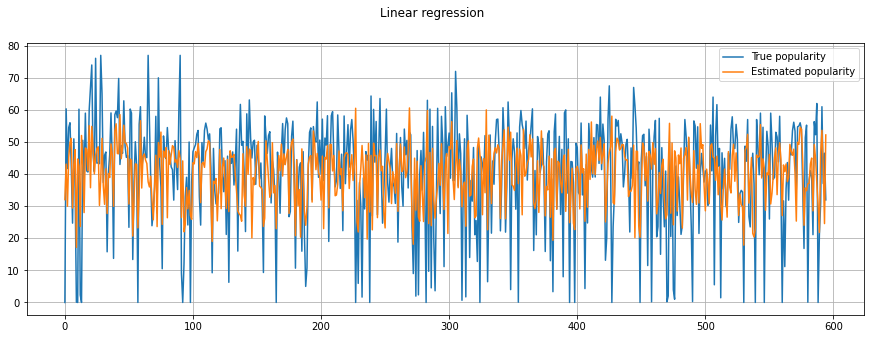

(206.7453289878996, 0.27003095943138233)


In [9]:
print(make_regression(df_normal,'popularity', LinearRegression(), plot=True, title="Linear regression"))

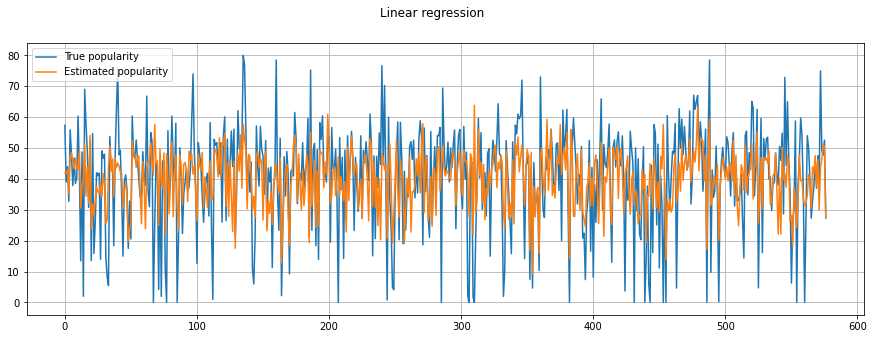

(185.2005519951544, 0.3246363505994805)


In [10]:
print(make_regression(df_normal_standardized,'popularity', LinearRegression(), plot=True, title="Linear regression"))

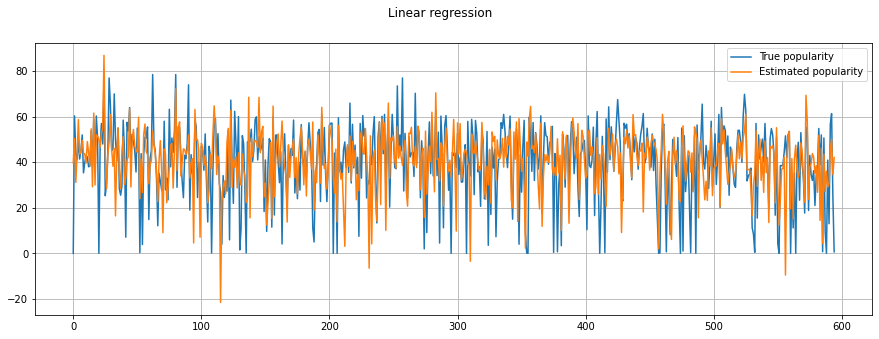

(213.1799359160322, 0.23655573805555474)


In [11]:
print(make_regression(df_genres,'popularity', LinearRegression(), plot=True, title="Linear regression"))

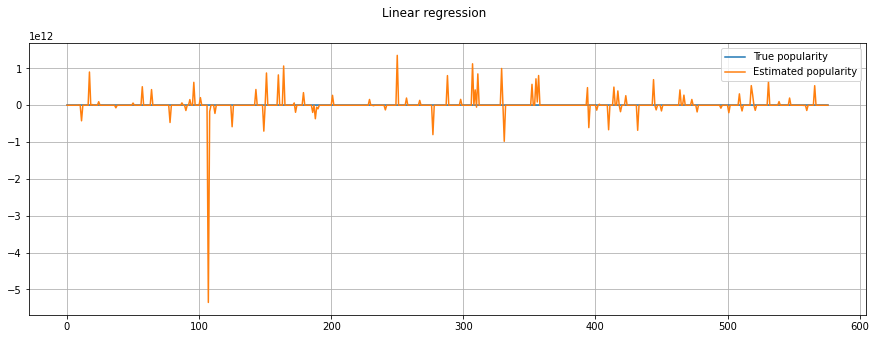

(8.308735788548596e+22, -2.8777073342981017e+20)


In [12]:
print(make_regression(df_genres_standardized,'popularity', LinearRegression(), plot=True, title="Linear regression"))

## Let's improve this

In [31]:
from sklearn import model_selection
from sklearn.linear_model import ElasticNet, Ridge, Lasso

def compute_rmse_ridge_lasso(df, target, lam_list, ridge=True, scoring='neg_root_mean_squared_error'):
    X = df.drop(target, axis=1)
    y = df[target]

    scores = np.zeros(len(lam_list))

    kfold = model_selection.KFold(n_splits=10, random_state=7)

    for i, lam in enumerate(lam_list):
        if ridge:
            regr = Ridge(lam)
        else:
            regr = Lasso(lam)
        scores[i] = -np.mean(model_selection.cross_val_score(regr, X, y, cv=kfold, scoring=scoring))

    return scores

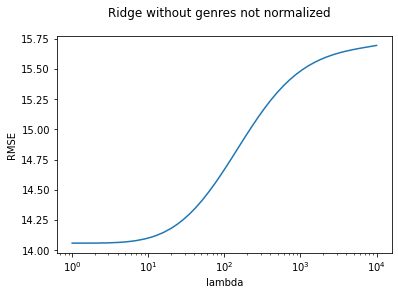

In [36]:
lam_list = np.logspace(0, 4, 50, dtype=np.int)

normal_rmse = compute_rmse_ridge_lasso(df_normal, 'popularity', lam_list, ridge=True)
plt.plot(lam_list, normal_rmse)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.suptitle('Ridge without genres not normalized')
plt.show()

In [33]:
genres_rmse = compute_rmse_ridge_lasso(df_genres, 'popularity', lam_list, ridge=True)

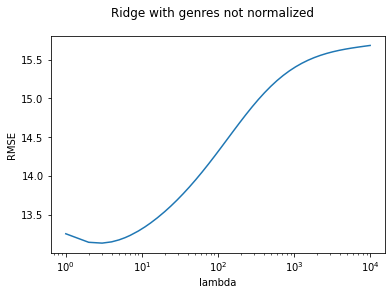

In [35]:
plt.plot(lam_list, genres_rmse)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.suptitle('Ridge with genres not normalized')
plt.show()

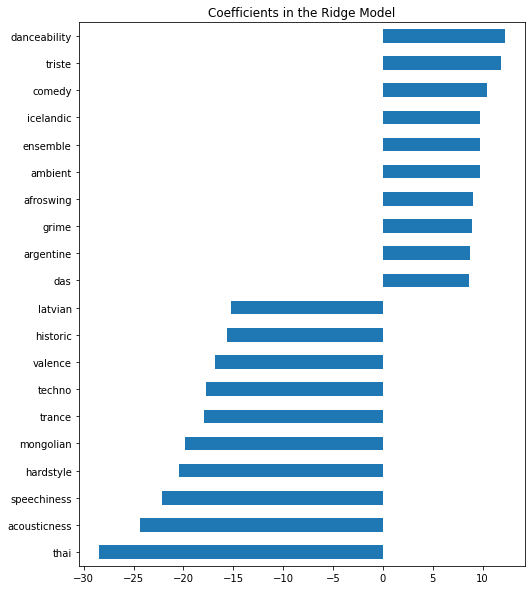

In [38]:
import matplotlib

best_lambda = lam_list[np.argmin(genres_rmse)]

ridge = Ridge(alpha=best_lambda)
ridge.fit(df_genres.drop('popularity', axis=1), df_genres['popularity'])

# Variables corresponding to the 10 highest coefficients and the 10 lowest coefficients
coef = pd.Series(ridge.coef_, index = df_genres.drop('popularity', axis=1).columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


